In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix ,accuracy_score,roc_auc_score,roc_curve
from sklearn.datasets import load_breast_cancer

In [12]:
df=load_breast_cancer()
X=df.data
y=df.target

In [13]:
X_train,y_train,X_test,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=LogisticRegression(max_iter=10000)

In [17]:
param_grid = {
    'penalty': ['l1', 'l2','none'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga']
}

In [20]:
grid_search=GridSearchCV(model,param_grid,cv=5,scoring='accuracy',n_jobs=-1)
grid_search.fit(X_train,y_train)
print("Best Parameter(GridSearch)=",grid_search.best_params_)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/skle

Best Parameter(GridSearch)= {'C': 78.47599703514607, 'l1_ratio': 0, 'penalty': 'l2', 'solver': 'lbfgs'}


In [21]:
best_model=grid_search.best_estimator_
y_pred=best_model.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("ROC AUC: ",roc_auc_score(y_test,best_model.predict_proba(X_test)[:,1]))

Accuracy:  0.956140350877193
ROC AUC:  0.9967245332459876


In [22]:
conf_matrix=confusion_matrix(y_test,y_pred)
print(conf_matrix)

[[39  4]
 [ 1 70]]


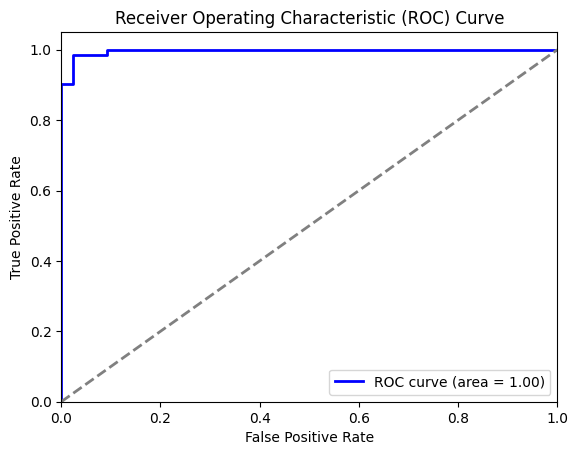

In [23]:
# ROC Curve for Grid Search
fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from sklearn.datasets import make_classification
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

In [4]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
lr = LogisticRegression(C=50,multi_class='auto',random_state=55)
lr.fit(X_train_std,y_train)
y_pred = lr.predict(X_test_std)
print(f'Accuracy Score is {accuracy_score(y_pred,y_test)}')

Accuracy Score is 0.9777777777777777


In [6]:
iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [7]:
from sklearn.linear_model import LogisticRegression
weights, params=[], []
for c in range(0,5):
    lr=LogisticRegression(C=10**c,multi_class="auto", random_state=0)
    lr.fit(X_train_std,y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
weights=np.array(weights)

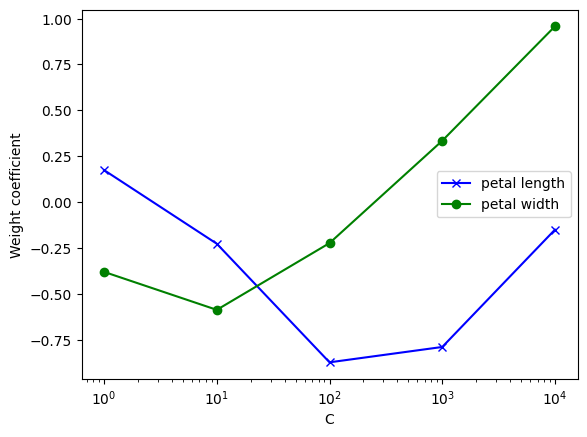

In [8]:
plt.plot(params, weights[:, 0], color='blue', marker='x', label='petal length')
plt.plot(params, weights[:, 1], color='green', marker='o', label='petal width')
plt.ylabel('Weight coefficient')
plt.xlabel('C')
plt.legend(loc='right')
plt.xscale('log')
plt.show()

In [9]:
lr=LogisticRegression(C=10, random_state=0)
lr.fit(X_train_std,y_train)
y_pred=lr.predict(X_test_std)
print(accuracy_score(y_pred,y_test))

0.9777777777777777


/var/folders/kv/njbqhgwj7pj95shqxr8qqyg40000gn/T/ipykernel_8535/4291090146.py:31: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


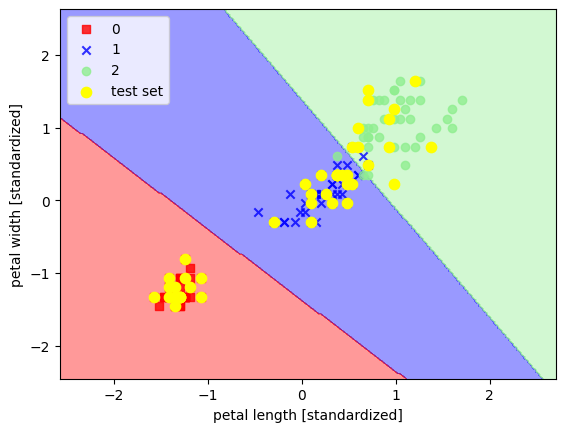

In [10]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
  np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  X_test, y_test = X[test_idx, :], y[test_idx]
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                alpha=0.8, c=cmap(idx),
                marker=markers[idx], label=cl)
  if test_idx:
    X_test, y_test = X[test_idx, :], y[test_idx]
    plt.scatter(X_test[:, 0], X_test[:, 1], c='Yellow',
                alpha=1.0, linewidth=1, marker='o',
                s=55, label='test set')
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined_std,y_combined, classifier=lr,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()